In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import re
from difflib import SequenceMatcher

In [2]:
y_june = (
    pd.read_csv('DATA/youtubejune2022.csv')
    .assign(Month='June')
    .rename(columns={
        "channel name": "username",
        "youTuber":"name",
        "Category": "category1",
        "Category_2": "category2",
        "Subscribers count": "subs",
        "Country": "country",
        "Views avg.": "views",
        "Likes avg": "likes",
        "Comments avg.": "comments",
        "Month": "month"
    })
    .dropna()
)
y_june.head(1)

,username,name,category1,category2,subs,country,views,likes,comments,month
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',June


In [3]:
y_sep = (
    pd.read_csv('DATA/Youtubesep2022.csv')
    .assign(Month='September')
    .rename(columns={
        "Name": "username",
        "Youtuber":"name",
        "Category_2": "category2",
        " Subscribers": "subs",
        "Country": "country",
        "Avg. views\r\n": "views",
        "Avg. likes": "likes",
        "Avg Comments": "comments",
        "Category_3": "category3",
        "Month": "month"
    })
    .drop("S.no", axis=1)
    .dropna()
)
y_sep.head(1)

,username,name,country,subs,category2,views,likes,comments,category3,month
3,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,September


In [4]:
y_nov = (
    pd.read_csv('DATA/youtubenov2022.csv')
    .assign(Month='November')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    .dropna()
)
y_nov.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
3,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,November


In [5]:
y_dec= pd.read_csv('DATA/YOUTUBEDEC2022.csv')
y_dec = (
    pd.read_csv('DATA/YOUTUBEDEC2022.csv')
    .assign(Month='December')
    .rename(columns={
        "Youtube channel": "username",
        "youtuber name":"name",
        "Category": "category1",
        "Followers": "subs",
        "Country": "country",
        "\nViews (Avg.)": "views",
        "Likes (Avg.)": "likes",
        "Comments (Avg.)": "comments",
        "Category-2": "category2",
        "Month": "month"
    })
    .drop("s.no", axis=1)
    .dropna()
)
y_dec.head(1)

,username,name,category1,subs,country,views,likes,comments,category2,month
3,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,December


In [6]:
numeric_text_cols = ['subs', 'views', 'likes', 'comments']

def delete_rows_with_value(df, value):
    df.replace(value, np.nan, inplace=True)
    return df

y_june = delete_rows_with_value(y_june, "N/A'")
y_june.head(1)

,username,name,category1,category2,subs,country,views,likes,comments,month
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,NaN,June


In [7]:
def cientific_int(column: pd.Series) -> pd.Series:
    return (
        column
        .fillna('0')
        .replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True)
        .map(pd.eval)
        .astype(int)
        .replace(0, np.nan)
    )

y_june.loc[:, numeric_text_cols] = y_june[numeric_text_cols].apply(cientific_int)
y_sep.loc[:, numeric_text_cols] = y_sep[numeric_text_cols].apply(cientific_int)
y_nov.loc[:, numeric_text_cols] = y_nov[numeric_text_cols].apply(cientific_int)
y_dec.loc[:, numeric_text_cols] = y_dec[numeric_text_cols].apply(cientific_int)

In [8]:
y_months = (
    pd.concat([y_june, y_sep, y_nov, y_dec], ignore_index=True)
    .drop_duplicates()
)

y_months

,username,name,category1,category2,subs,country,views,likes,comments,month,category3
0,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10600000.0,-,348.0,3.0,NaN,June,NaN
1,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,Education,Toys,15700000.0,-,1200000.0,4200.0,NaN,June,NaN
2,Трум Трум,Трум Трум,Humor,Toys,13700000.0,-,103200.0,1800.0,83.0,June,NaN
3,dangmattsmith,Dang Matt Smith,Animation,Humor,13700000.0,-,103500.0,4400.0,332.0,June,NaN
4,DuDuPopTOY,DuDuPopTOY,Animation,Humor,10500000.0,-,11100.0,109.0,NaN,June,NaN
...,...,...,...,...,...,...,...,...,...,...,...
863,TopMovieClips,TopMovieClips,Movies,Animation,10300000.0,United States,124500.0,2100.0,140.0,December,NaN
864,topperguild,Topper Guild,Animation,Humor,10300000.0,United States,288900.0,5900.0,680.0,December,NaN
865,Wylsacom,Wylsacom,Science & Technology,News & Politics,10300000.0,Russia,291700.0,13000.0,950.0,December,NaN
866,JessicaJulioeBaby,Laurinha e Helena - Clubinho da Laura,Movies,Animation,10300000.0,Brazil,83500.0,1400.0,NaN,December,NaN


# Análisis

## 1. Número total de cuentas distintas

In [9]:
y_months.username.drop_duplicates().size

415

## 2. Promedio de seguidores, views, likes y comments

In [10]:
y_means = (
    y_months
    .groupby('username')
     # aggregate functiosn skips nan by deffault
    .aggregate({
        'subs': 'mean',
        'views': 'mean',
        'likes': 'mean',
        'comments': 'mean'
    })    
    .reset_index()
    .sort_values('subs', ascending=False)
)

In [11]:
y_means

,username,subs,views,likes,comments
195,MrBeast,110550000.0,56650000.0,2.550000e+06,85400.0
197,MrBeast6000,103200000.0,53650000.0,3.500000e+06,109150.0
412,✿ Kids Diana Show,96600000.0,11400000.0,4.090000e+04,NaN
394,sabtv,72100000.0,41900.0,7.243333e+02,18.0
274,Sony SAB,71700000.0,61700.0,9.240000e+02,18.0
...,...,...,...,...,...
135,JoeyGraceffa,9400000.0,311100.0,2.380000e+04,1500.0
153,LetDa Hyper,9400000.0,142400.0,7.400000e+03,510.0
313,Troom Troom SELECT,9300000.0,254800.0,2.900000e+03,52.0
304,Thơ Nguyễn,9300000.0,185500.0,2.400000e+03,106.0


## 3. Métricas de valor de cada cuenta

### Métricas de valor

In [12]:
y_means['views_ratio'] = y_means.views / y_means.subs
y_means['likes_ratio'] = y_means.likes / y_means.subs
y_means['comments_ratio'] = y_means.comments / y_means.subs

In [13]:
y_means

,username,subs,views,likes,comments,views_ratio,likes_ratio,comments_ratio
195,MrBeast,110550000.0,56650000.0,2.550000e+06,85400.0,0.512438,0.023066,7.725011e-04
197,MrBeast6000,103200000.0,53650000.0,3.500000e+06,109150.0,0.519864,0.033915,1.057655e-03
412,✿ Kids Diana Show,96600000.0,11400000.0,4.090000e+04,NaN,0.118012,0.000423,NaN
394,sabtv,72100000.0,41900.0,7.243333e+02,18.0,0.000581,0.000010,2.496533e-07
274,Sony SAB,71700000.0,61700.0,9.240000e+02,18.0,0.000861,0.000013,2.510460e-07
...,...,...,...,...,...,...,...,...
135,JoeyGraceffa,9400000.0,311100.0,2.380000e+04,1500.0,0.033096,0.002532,1.595745e-04
153,LetDa Hyper,9400000.0,142400.0,7.400000e+03,510.0,0.015149,0.000787,5.425532e-05
313,Troom Troom SELECT,9300000.0,254800.0,2.900000e+03,52.0,0.027398,0.000312,5.591398e-06
304,Thơ Nguyễn,9300000.0,185500.0,2.400000e+03,106.0,0.019946,0.000258,1.139785e-05


## 4. Histograma del número de cuentas que inicien por cada letra del alfabeto

### Gráficas

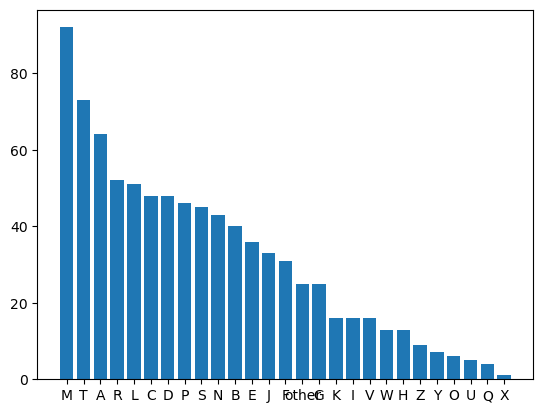

In [14]:
def get_inicial(name: str) -> str:
    name = str(name)
    first_is_letter = re.search(r'^[a-zA-Z]', name)
    if first_is_letter:
        return name[0].upper()
    else:
        return 'other'

initials = (
    y_months.name
    .map(get_inicial)
    .value_counts()
    .reset_index(name='frequency')
    .rename(columns={
        'index': 'letter',
        'name': 'letter'
    })
)
plt.bar(initials.letter, initials.frequency)
plt.show()

## 5. Cuántas cuentas tienen ya sea en su username o name las letras de las iniciales de cada uno de lo sintegrantes?

In [15]:
(y_months.name.str.contains(r'[GgIiMm]') | y_months.name.str.contains(r'[GgIiMm]')).sum()

692

## 6. Defina una métrica que identifique las 10 cuentas más importantes de youtube

In [16]:
y_means = (
    y_means
    .assign(
        engagement_size = (y_means.views / y_means.subs) * (y_means.subs / max(y_means.subs))
    )
    .sort_values(['views'], ascending=False)
)
y_means[['username', 'views']].head(10)

,username,views
30,Bad Bunny,6.940000e+07
195,MrBeast,5.665000e+07
197,MrBeast6000,5.365000e+07
36,Bizarrap,3.320000e+07
49,CarryMinati,2.470000e+07
20,Anuel AA,1.633333e+07
118,Harsh Beniwal,1.475000e+07
10,AddictedA1,1.470000e+07
276,Stokes Twins,1.190000e+07
412,✿ Kids Diana Show,1.140000e+07


## 7. Grafique un histograma del número de seguidores por país

In [17]:
y_means.head(1)

,username,subs,views,likes,comments,views_ratio,likes_ratio,comments_ratio,engagement_size
30,Bad Bunny,42150000.0,69400000.0,1700000.0,58400.0,1.646501,0.040332,0.001386,0.62777


In [18]:
y_country_means = (
    y_means
    .merge(y_months, on='username', how='left')
    [['username', 'country', 'subs']]
    .groupby('country')
    .mean()
    .reset_index()
)

plt.hist(y_country_means.subs, bins=10)
plt.xlabel('Número de seguidores')
plt.ylabel('Frecuencia')
plt.title('Histograma del número de seguidores por país')
plt.show()


KeyError: "['subs'] not in index"

## 8. Crea una serie con todas las categorías existentes en todos los archivos de youtube

In [19]:
y_categories = (y_months.category1 + y_months.category2).dropna().drop_duplicates().reset_index(name='category')
y_categories = list(y_categories.category)

In [20]:
category_re = r'[A-Z][a-z\s]+[a-z]$'
res = set()
for element in y_categories:
    has_categories = re.findall(category_re, str(element))
    if has_categories:
        res = res.union(set(has_categories))

y_categories = pd.Series(list(res))
y_categories

0        Politics
1          Drinks
2       Education
3            Help
4         Mystery
5         Fitness
6          Beauty
7          Movies
8           Humor
9        Vehicles
10      Animation
11    Video games
12           Toys
13          Hacks
14        Fashion
15     Technology
dtype: object

## 9. Crea una serie con todos los países existente en todos los archivos de youtube

In [21]:
all_countries = y_months.country.dropna().drop_duplicates()
all_countries

0                   -
42          Argentina
45             Brazil
67           Colombia
68             France
69              India
84          Indonesia
103              Iraq
105             Japan
107            Mexico
124          Pakistan
125              Peru
126       Philippines
129            Russia
136      Saudi Arabia
137             Spain
140          Thailand
143    United Kingdom
146     United States
425            Turkey
Name: country, dtype: object